# LIBRARIES IMPORT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

# DATA IMPORT

Get data from csv

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

# DATA EXPLORATION

See what does data looks like

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# DATA PROCESSING

## Pre process data according to data viz observations

In [4]:
df_p = df.drop(df[df.Year_Birth < 1920].index)

In [5]:
df_p.drop(df[df.Marital_Status =='Absurd'].index, inplace = True)
df_p.drop(df[df.Marital_Status =='YOLO'].index, inplace = True)
df_p.replace('Alone', 'Single', inplace = True)

In [6]:
df_p.drop(df[df.Income == 666666].index, inplace = True)

In [7]:
df_p.dropna(inplace=True)

In [8]:
df_p.reset_index(inplace = True)

## Features selection and encoding

Get columns names to slice df to X below

In [9]:
#col = df.columns
#col

Slice df to define X_1, matrix of numerical features

In [10]:
X_1 = df_p[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]
#X_1

Label encode Education and Marital Status features

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
edu = le.fit_transform(df_p['Education'])
#edu

In [14]:
#edu = edu.reshape((-1, 1))
#edu

In [15]:
#pd.DataFrame(edu)[0].unique().to_numpy()

In [16]:
marit = le.fit_transform(df_p['Marital_Status'])
#marit

In [17]:
#marit = marit.reshape((-1, 1))
#marit

In [18]:
#pd.DataFrame(marit)[0].unique()

Definition of df X_2, matrix of encoded features

In [19]:
X_2 = pd.concat([pd.DataFrame(edu.reshape((-1, 1))), pd.DataFrame(marit.reshape((-1, 1)))], axis = 1)
X_2.columns = ['Education', 'Marital_Status']
#X_2

Definition of X, matrix of all features

In [20]:
X = pd.concat([X_1, X_2], axis = 1)
#X

Heatmap ?

In [21]:
#import seaborn as sns

In [22]:
#fig = plt.figure(figsize=(20, 20))

#sns.heatmap(X.corr(), annot = True, fmt=".1f")

## Features Standardization

In [23]:
from sklearn.preprocessing import normalize, StandardScaler, MaxAbsScaler

In [24]:
#X_n = pd.DataFrame(normalize(X, axis = 0), columns = X.columns)
scaler = StandardScaler()
#scaler = MaxAbsScaler()

scaler

StandardScaler()

In [25]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

In [26]:
#x1 = scaler1.fit_transform(X[['Year_Birth']])

In [27]:
#x1_df = pd.DataFrame(scaler1.fit_transform(X[['Year_Birth']]), columns = ['Year_Birth'])
#x1_df.describe()

In [28]:
#x2_df = pd.DataFrame(scaler2.fit_transform(X[['Income']]), columns = ['Income'])
#x2_df

In [29]:
#scaler.fit(X)

In [30]:
#caler.mean_

In [31]:
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
0,1957,58138.0,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,1,2,2
1,1954,46344.0,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,0,2,2
2,1965,71613.0,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,0,2,3
3,1984,26646.0,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,0,2,3
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,0,4,1


In [32]:
X_n = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_n.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
0,-1.017915,0.287689,-0.824004,-0.929587,0.309118,0.977018,1.553315,1.689944,2.464405,1.482521,...,0.692301,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,2.381322,-0.351204,0.253922
1,-1.274437,-0.260057,1.038228,0.907950,-0.382230,-0.871705,-0.636864,-0.717917,-0.651086,-0.634157,...,-0.133077,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935,-0.351204,0.253922
2,-0.333858,0.913505,-0.824004,-0.929587,-0.797039,0.357814,0.571511,-0.178378,1.346494,-0.147565,...,-0.545767,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935,-0.351204,1.194627
3,1.290779,-1.174887,1.038228,-0.929587,-0.797039,-0.871705,-0.561341,-0.655491,-0.504474,-0.585498,...,0.279612,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935,-0.351204,1.194627
4,1.034258,0.294887,1.038228,-0.929587,1.553545,-0.391748,0.420464,-0.218509,0.155277,-0.001587,...,-0.133077,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935,1.431460,-0.686783


In [33]:
#Inverse transform test

#X_r = pd.DataFrame(scaler.inverse_transform(X_n), columns = X.columns)
#X_r.head()

Heat map ?

In [34]:
#fig = plt.figure(figsize=(20, 20))

#sns.heatmap(X_n.corr(), annot = True, fmt=".1f")

# CLASSIFICATION

## Cluster number optimization

In [35]:
from sklearn.cluster import KMeans

In [36]:
sse = []
for k in range(1, 13):
    model_km = KMeans(n_clusters=k)
    model_km.fit(X_n)
    sse.append(model_km.inertia_)

C:\Users\utile\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [37]:
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})
#cluster_df

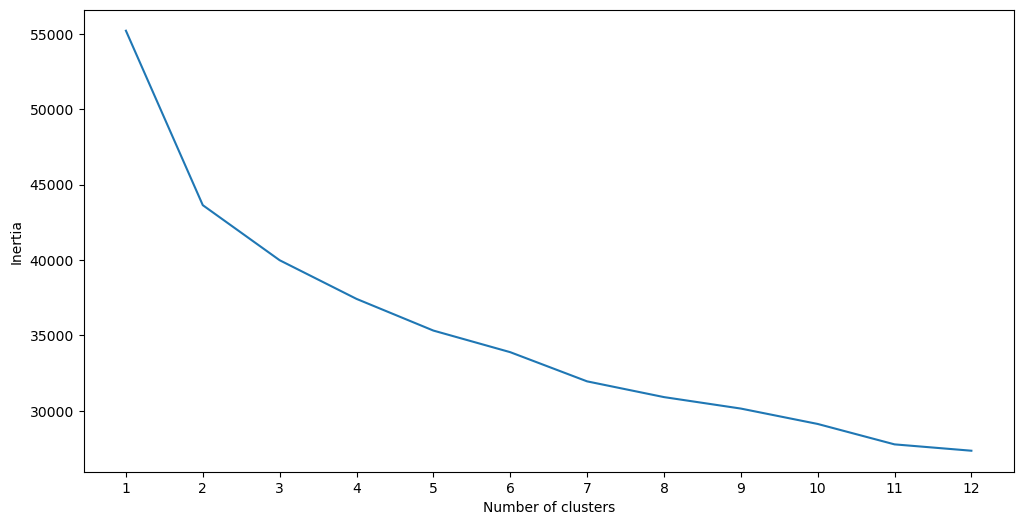

In [38]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_df['Cluster'])
plt.show()

In [39]:
n_clusters = 2
random_state = 130

## Train

In [40]:
model_orig = KMeans(n_clusters = n_clusters, random_state = random_state)
model_n = KMeans(n_clusters = n_clusters, random_state = random_state)

In [41]:
#model.get_params()

In [42]:
model_orig.fit(X)
model_n.fit(X_n)

KMeans(n_clusters=2, random_state=130)

In [43]:
#model.inertia_

In [44]:
y_pred_orig = model_orig.predict(X)
y_pred_orig_df = pd.DataFrame(y_pred_orig, columns=['y_pred'])
y_pred_orig_df['y_pred'].value_counts()

0    1134
1    1074
Name: y_pred, dtype: int64

In [45]:
y_pred_n = model_n.predict(X_n)
y_pred_n_df = pd.DataFrame(y_pred_n, columns=['y_pred'])
y_pred_n_df['y_pred'].value_counts()

1    1329
0     879
Name: y_pred, dtype: int64

In [46]:
#model.cluster_centers_

In [47]:
centers_orig = pd.DataFrame(model_orig.cluster_centers_, columns = X.columns)
centers_orig.sort_values('Year_Birth', inplace = True)
centers_orig

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
1,1966.725326,70308.50838,0.152700,0.540037,49.059590,544.420857,46.558659,304.866853,65.289572,47.800745,...,3.918994,0.064246,0.127561,0.148045,0.127561,0.024209,0.006518,0.189013,2.506518,1.726257
0,1970.968254,34550.22575,0.716931,0.473545,49.055556,78.688713,7.109347,36.435626,11.233686,7.426808,...,6.651675,0.082892,0.023810,0.000882,0.003527,0.003527,0.011464,0.112875,2.287478,1.733686


In [48]:
centers_n = pd.DataFrame(model_n.cluster_centers_, columns = X.columns)
centers_n

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
0,-0.159049,0.913976,-0.705363,-0.139384,0.006427,0.903941,0.745727,0.872871,0.764281,0.745435,...,-0.670184,0.035285,0.224357,0.422602,0.362319,0.157793,-0.011551,0.233373,0.054408,0.013127
1,0.105195,-0.604504,0.466527,0.092188,-0.004251,-0.597866,-0.493224,-0.577316,-0.505495,-0.493031,...,0.443259,-0.023338,-0.148389,-0.279508,-0.239637,-0.104364,0.007640,-0.154353,-0.035985,-0.008682


In [49]:
centers_r = pd.DataFrame(scaler.inverse_transform(centers_n), columns = X.columns)
centers_r.sort_values('Year_Birth', inplace = True)
centers_r

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
0,1967.044369,71623.150171,0.063709,0.430034,49.243458,610.334471,55.920364,362.758817,79.230944,57.704209,...,3.698521,0.083049,0.133106,1.820250e-01,0.152446,0.031854,0.007964,0.233220,2.455063,1.744027
1,1970.134688,38927.422874,0.693002,0.556057,48.934537,103.428894,6.705794,37.531979,9.944319,6.800602,...,6.396539,0.067720,0.035365,-1.387779e-17,0.005267,0.001505,0.009782,0.094808,2.353649,1.720843


## Evaluation

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
#model_orig.labels_

In [52]:
sil_orig = silhouette_score(X, model_orig.labels_) # metric='euclidean', sample_size=None, random_state=None, **kwds
sil_orig

0.6065025793693138

In [53]:
sil_n = silhouette_score(X_n, model_n.labels_) # metric='euclidean', sample_size=None, random_state=None, **kwds
sil_n

0.24264486823378154

# BACK TO FEATURES ENGINEERING = PCA

In [54]:
#sns.pairplot(X)

In [55]:
from sklearn.decomposition import PCA

In [56]:
n_components = 2

In [57]:
#pca = PCA()

In [58]:
pca = PCA(n_components=n_components)

In [59]:
pca.fit(X)

PCA(n_components=2)

In [60]:
#X.shape

In [61]:
X_pca = pca.transform(X)
 
# Check the dimensions of data after PCA
#X_pca.shape

In [62]:
# Check the values of eigen vectors
# prodeced by principal components
#pca.components_

In [63]:
# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2']))

      Year_Birth    Income   Kidhome      Teenhome   Recency  MntWines  \
PC-1   -0.000109  0.999913 -0.000013  8.975088e-07  0.000010  0.010791   
PC-2    0.000760  0.012079  0.000451  1.759027e-04 -0.002073 -0.979086   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
PC-1   0.000935         0.007214         0.001317          0.001000  ...   
PC-2  -0.014419        -0.196888        -0.021719         -0.012341  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
PC-1          -0.000073 -1.814776e-07      0.000003      0.000005   
PC-2          -0.001474 -1.075311e-04     -0.000300     -0.000301   

      AcceptedCmp1  AcceptedCmp2      Complain  Response  Education  \
PC-1      0.000004  5.601390e-07 -1.225245e-07  0.000003   0.000008   
PC-2     -0.000184 -8.125343e-05  8.962121e-06 -0.000295  -0.000516   

      Marital_Status  
PC-1    5.206356e-07  
PC-2   -1.885572e-05  

[2 rows x 25 columns]


Text(0, 0.5, 'pc2')

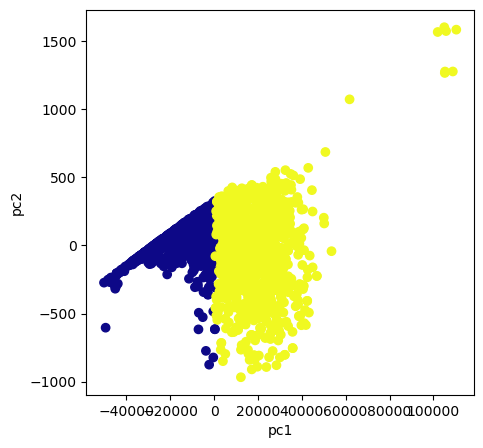

In [64]:
plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred_orig,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [65]:
pca_n = PCA(n_components=n_components)

In [66]:
pca_n.fit(X_n)

PCA(n_components=2)

In [67]:
X_n_pca = pca_n.transform(X_n)

In [68]:
#pca_n.components_

In [69]:
# Dump components relations with features:
print(pd.DataFrame(pca_n.components_,columns=X_n.columns,index = ['PC-1','PC-2']))

      Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
PC-1   -0.061382  0.330897 -0.252681 -0.051401  0.001150  0.303665   0.260581   
PC-2   -0.357322  0.081886 -0.084684  0.519476  0.022362  0.196015  -0.148253   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
PC-1         0.310669         0.270617          0.264654  ...   
PC-2        -0.128839        -0.160290         -0.138045  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
PC-1          -0.245171      0.019055      0.095860      0.188317   
PC-2           0.169227     -0.061142      0.176111     -0.103094   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Education  \
PC-1      0.168071      0.057916 -0.014162  0.105604   0.020637   
PC-2     -0.092395      0.057694 -0.012695 -0.046611   0.240321   

      Marital_Status  
PC-1        0.010143  
PC-2       -0.000778  

[2 rows x 25 columns]


Text(0, 0.5, 'pc2')

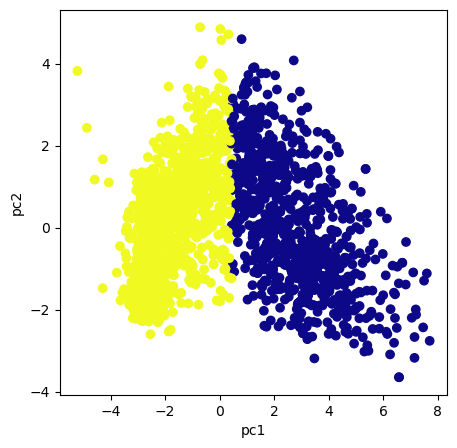

In [70]:
plt.figure(figsize=(5, 5))
plt.scatter(X_n_pca[:,0],X_n_pca[:,1],c=y_pred_n,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')